In [1]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image

import torch, random, numpy as np
from transformers import set_seed

def set_all_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    set_seed(seed)
    torch.backends.cudnn.deterministic = True

set_all_seeds(9)

from safetensors import safe_open

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:

# image1 = load_image("../validation_data/42.jpg")
# image1 = load_image("../validation_data/angela-porter-2021-jan-25.jpg")
image1 = load_image("../validation_data/wide-panorama-image-new-york-260nw-1740358448.jpg")
print(f"Image 1 size: {image1.size}")


processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Can you describe the image?"}
        ]
    },
]

Image 1 size: (981, 280)


In [27]:
processor

Idefics3Processor:
- image_processor: Idefics3ImageProcessor {
  "do_convert_rgb": true,
  "do_image_splitting": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "Idefics3ImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "max_image_size": {
    "longest_edge": 384
  },
  "processor_class": "Idefics3Processor",
  "resample": 1,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 1536
  }
}

- tokenizer: GPT2TokenizerFast(name_or_path='HuggingFaceTB/SmolVLM-Instruct', vocab_size=49152, model_max_length=16384, is_fast=True, padding_side='right', truncation_side='left', special_tokens={'bos_token': '<|im_start|>', 'eos_token': '<end_of_utterance>', 'unk_token': '<|endoftext|>', 'pad_token': '<|im_end|>', 'additional_special_tokens': ['<fake_token_around_image>', '<image>', '<end_of_utterance>']}, clean_up_tokenization_spaces=False, added

In [19]:
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image1], return_tensors="pt")

In [20]:
list(inputs)

['pixel_values', 'pixel_attention_mask', 'input_ids', 'attention_mask']

In [21]:
inputs["pixel_attention_mask"].min(), inputs["pixel_attention_mask"].max(), inputs["attention_mask"].min(), inputs["attention_mask"].max(),

(tensor(1), tensor(1), tensor(1), tensor(1))

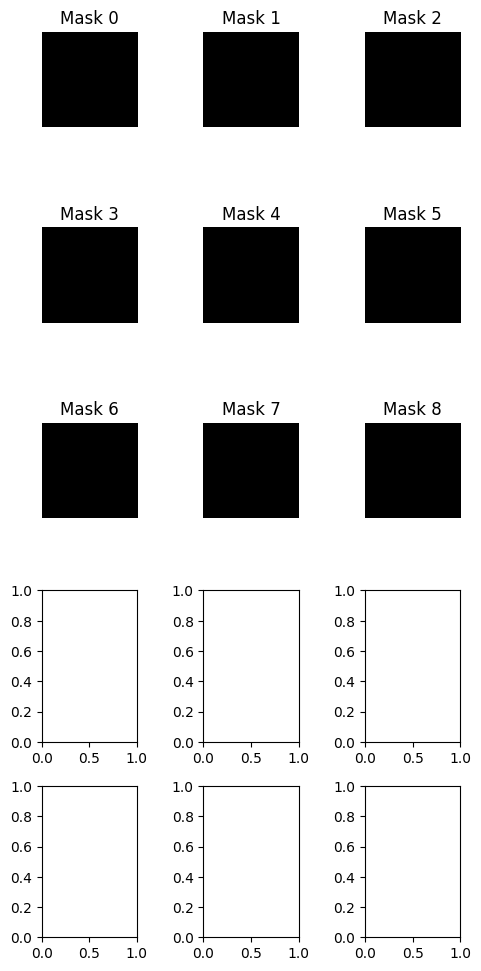

In [24]:
# Plot all 13 pixel attention masks (384x384) using matplotlib
import matplotlib.pyplot as plt
import numpy as np
masks = inputs["pixel_attention_mask"][0]  # shape: (13, 384, 384) or (batch, H, W)
if masks.ndim == 4:
    masks = masks.squeeze(1)  # Remove channel dim if present
fig, axes = plt.subplots(5, 3, figsize=(5, 10))
axes = axes.flatten()
for i in range(9):
    ax = axes[i]
    ax.imshow(masks[i].cpu().numpy(), cmap='gray')
    ax.set_title(f"Mask {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

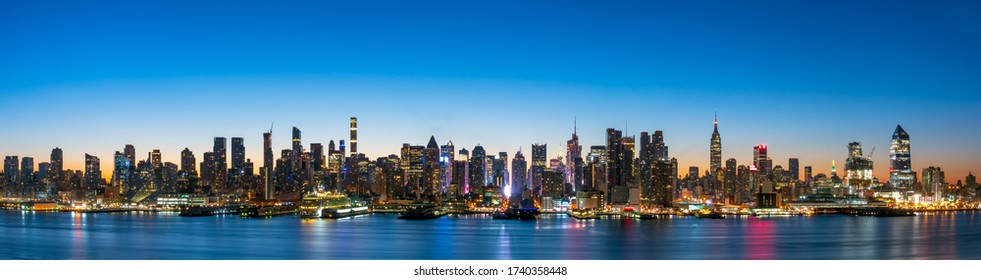

In [25]:
image1